In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt

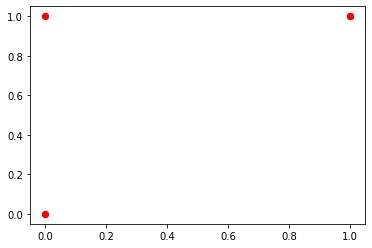

In [4]:
X = np.array([(0,0),(1,0)
     ,(0,1),(1,1)])
Y = np.array([0,1,1,1])

plt.plot(X,Y,'ro')
plt.show() 


In [17]:
class logistic_regression():
    def __init__(self,dim = 2,method = 'standard_normal'):
        if method == 'rand':
            self.w = np.random.rand(dim)
            self.b = np.random.rand()
        elif method == 'randn':
            self.w = np.random.randn(dim)
            self.b = np.random.randn()
        elif method == 'standard_normal':
            self.w = np.random.standard_normal(dim)
            self.b = np.random.standard_normal()
        else:
            self.w = np.random.standard_normal(dim)
            self.b = np.random.standard_normal()
    
    def sigmoid(self,z):
        return 1/(1+np.exp(-z))
    
    def predict(self,X):
        z = X@self.w + self.b
        return self.sigmoid(z)
    
def train(X,Y,model,lr=0.1):
    dw = np.zeros((model.w.shape[0]))
    db = 0.0
    m = len(X)
    cost = 0.0
    for x,y in zip(X,Y):
        pred = model.predict(x)
        cost -= np.log(pred) if y else np.log(1-pred)
        dw += (pred-y)*x
        db +=(pred -y)
    cost /= m
    model.w -= lr*dw/m
    model.b -= lr*db/m
    return cost
    

In [18]:
logi = logistic_regression()
logi_lr2 = logistic_regression()
logi_lr3 = logistic_regression()

In [19]:
costs_lr1 = []
costs_lr2 = []
costs_lr3 = []

for epoch in range(1000):
    cost_lr1 = train(X,Y,logi_lr1,0.1)
    cost_lr2 = train(X,Y,logi_lr2,0.25)
    cost_lr3 = train(X,Y,logi_lr3,0.75)
    costs_lr1.append(cost_lr1)
    costs_lr2.append(cost_lr2)
    costs_lr3.append(cost_lr3)

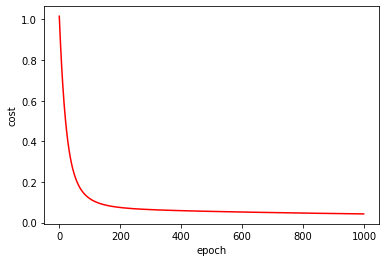

In [20]:
plt.plot(costs_lr1,'r')

plt.xlabel('epoch')
plt.ylabel('cost')

plt.show()



In [21]:
test_inputs = np.array([(0,0),(1,0)
     ,(0,1),(1,1)])

for test in test_inputs:
    predict = logi_lr1.predict(test)
    if predict > 0.5 :
        print("true")
    else:
        print("false")
    print(test,"predict : {}".format(predict) )
    


false
[0 0] predict : 0.09182766855637425
true
[1 0] predict : 0.9630678419265276
true
[0 1] predict : 0.9631842872880476
true
[1 1] predict : 0.999851812163657
